# Электрические цепи

In [1]:
import sympy as sp
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
x = sp.symbols('x',cls=sp.Function)
b, A, w, w0, t, k = sp.symbols('b, A, w, w0, t, k')
k = w / w0

## Колебания на контуре при выключенном источнике

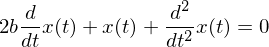

In [24]:
eq1 = sp.Eq(x(t).diff(t,2) + 2*b*x(t).diff(t) + x(t))  # выключенный источник
eq1

In [5]:
ics = {
    x(0) : 5,
    x(t).diff(t).subs(t,0) : 1,
}

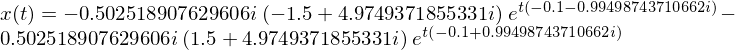

In [6]:
soln1 = sp.dsolve(eq1, x(t), ics=ics)
sol1 = soln1.subs(b, 0.1)
sol1

## Колебания на контуре при включенном источнике

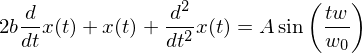

In [14]:
eq2 = sp.Eq(x(t).diff(t,2) + 2*b*x(t).diff(t) + x(t), A*sp.sin(w/w0 * t))
eq2

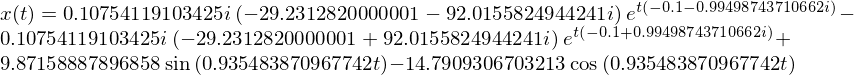

In [8]:
soln2 = sp.dsolve(eq2, x(t), ics=ics)
sol2 = soln2.subs(A, 4).subs(b,0.1).subs(w,2.9).subs(w0,3.1)
sol2

## Колебания, подаваемые источником на контур

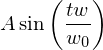

In [17]:
f = A*sp.sin(w/w0 * t)
f

### Совместные графики

In [18]:
f_0 = f.subs(A,4).subs(w,3).subs(w0,3)

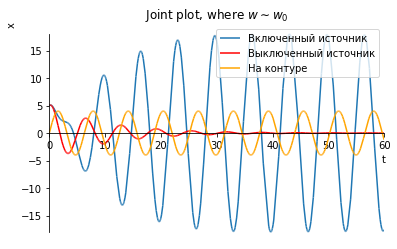

In [19]:
p = sp.plot(sol2.rhs, (t,0,60), show=False, title = "Joint plot, where $w \sim w_0$", ylabel = 'x')
p[0].label = 'Включенный источник'
p.append(sp.plot(sol1.rhs, (t,0,60), show=False,  line_color = 'red')[0])
p[1].label = 'Выключенный источник'
p.append(sp.plot(f_0, (t,0,60), show=False, line_color = 'orange', label='1')[0])
p[2].label = 'На контуре'
p.legend = True
p.show()

Получили резонанс

#### Будем изменять частоты

In [22]:
soln2_w0 = soln2.subs(A, 4).subs(b,0.1).subs(w,1).subs(w0,2).rhs  # w0 >> w
f_w0 = f.subs(A,4).subs(w,1).subs(w0,2)
soln2_w1 = soln2.subs(A, 4).subs(b,0.1).subs(w,2).subs(w0,1).rhs  # w >> w0
f_w = f.subs(A,4).subs(w,2).subs(w0,1)

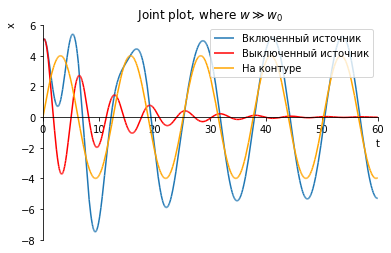

In [26]:
# Изменить: построить график, который выше, но с другими w и w0: увеличив сначала первое, затем второе.
p = sp.plot(soln2_w0, (t,0,60), show=False, title = "Joint plot, where $w \gg w_0$", ylabel = 'x')
p[0].label = 'Включенный источник'
p.append(sp.plot(sol1.rhs, (t,0,60), show=False,  line_color = 'red')[0])
p[1].label = 'Выключенный источник'
p.append(sp.plot(f_w0, (t,0,60), show=False, line_color = 'orange', label='1')[0])
p[2].label = 'На контуре'
p.legend = True
p.show()

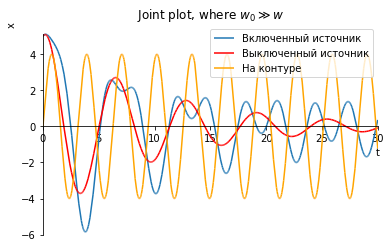

In [29]:
# Изменить: построить график, который выше, но с другими w и w0: увеличив сначала второе, затем первое.
p = sp.plot(soln2_w1, (t,0,30), show=False, title = "Joint plot, where $w_0 \gg w$", ylabel = 'x')
p[0].label = 'Включенный источник'
p.append(sp.plot(sol1.rhs, (t,0,30), show=False,  line_color = 'red')[0])
p[1].label = 'Выключенный источник'
p.append(sp.plot(f_w, (t,0,30), show=False, line_color = 'orange', label='1')[0])
p[2].label = 'На контуре'
p.legend = True
p.show()

## Ламповый генератор

Изобразим фазовый портрет уравнения Ван дер Поля:

In [3]:
import scipy.integrate
import scipy.optimize

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', context='notebook', palette=tuple(colors), 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [4]:
def plot_traj(ax, f, y0, t, args=(), color='black', lw=2):
    """
    Plots a trajectory on a phase portrait.
    
    Parameters
    ----------
    ax : Matplotlib Axis instance
        Axis on which to make the plot
    f : function for form f(y, t, *args)
        The right-hand-side of the dynamical system.
        Must return a 2-array.
    y0 : array_like, shape (2,)
        Initial condition.
    t : array_like
        Time points for trajectory.
    args : tuple, default ()
        Additional arguments to be passed to f
    n_grid : int, default 100
        Number of grid points to use in computing
        derivatives on phase portrait.
        
    Returns
    -------
    output : Matplotlib Axis instance
        Axis with streamplot included.
    """
    
    y = scipy.integrate.odeint(f, y0, t, args=args)
    ax.plot(*y.transpose(), color=color, lw=lw)
    return ax

In [5]:
def Van_der_Pol(xy, t, eps):
    """Right hand side of ODEs for Van_der_Pol equation"""
    x,y = xy
    return np.array([y, 2*eps*(1-x**2)*y-x])

#epsilon argument
eps = 1
args = (eps,)

#Solve
init_cond = np.array([1, 2]) # x'(0)=1 and y'(0)=2
init_cond_1 = np.array([2, 3]) # x'(0)=2 and y'(0)=3
t = np.linspace(0,30,200)
xy = scipy.integrate.odeint(Van_der_Pol, init_cond, t, args = args)

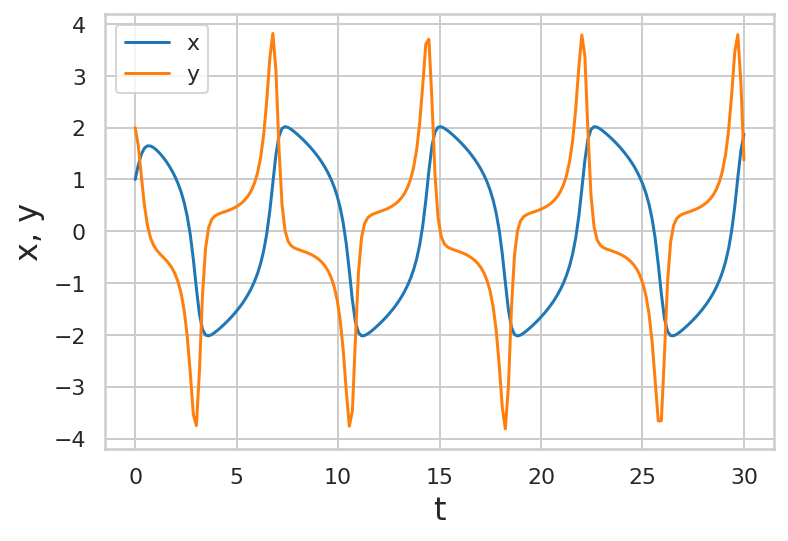

In [67]:
# Plot
plt.plot(t, xy)
plt.xlabel('t')
plt.ylabel('x, y')
plt.legend(('x', 'y'));

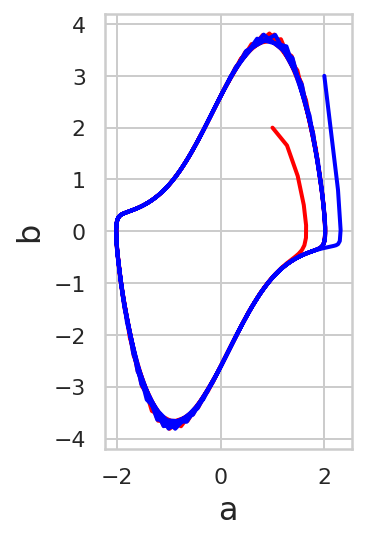

In [70]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_aspect('equal')

ax = plot_traj(ax,Van_der_Pol, init_cond, t, args = args, color = 'red')
ax = plot_traj(ax,Van_der_Pol, init_cond_1, t, args = args, color = 'blue')